In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import fig_text

## Load Dataset

Load and aggregate data into number of road accidents by **weekday**.


In [2]:
url = "https://raw.githubusercontent.com/anw-g01/dataviz-anw/refs/heads/main/road_safety_open_data_2016/data/road_accidents.csv"

df = pd.read_csv(url, parse_dates=["date_time"], date_format="%Y-%m-%d %H:%M:%S")

df = (
    df.drop_duplicates(subset=["index"])                        # retain one record (row) per accident
    .groupby("weekday_name")                                    # group accidents by weekday
    .size()                                                     # count no. of accidents in each weekday group
    .reset_index(name="num_accidents")                          # convert from Series to DataFrame and rename counts column
    .assign(weekday_name=lambda x: x["weekday_name"].str[:3])   # abbreviate weekday names to 3 letters (e.g. "Monday" to "Mon")
)

# define an order of weekdays (Mon - Sun)
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# convert weekday_name into an ordered categorical variable to enforce the defined weekday order
df["weekday_name"] = pd.Categorical(
    df["weekday_name"],
    categories=weekday_order,
    ordered=True
)

df = (
    df.sort_values("weekday_name", ascending=False)
    .reset_index(drop=True)
)

df

,weekday_name,num_accidents
0,Sun,15023
1,Sat,17818
2,Fri,22578
3,Thu,20949
4,Wed,20871
5,Tue,20104
6,Mon,19276


## Bar Chart - Number of Accidents by Weekday

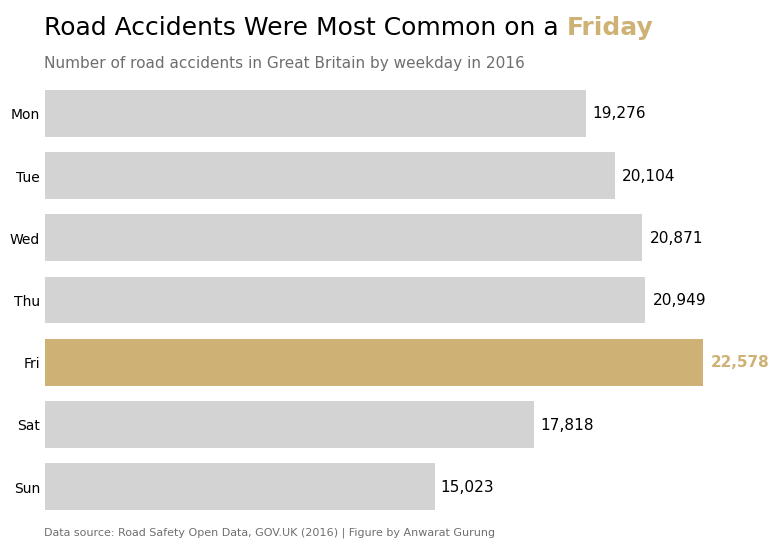

In [3]:
# choose a colour palette
cmap = load_cmap("AsteroidCity1")
colours = cmap.colors

# identify weekday with most accidents
highlight_day = df.loc[df["num_accidents"].idxmax(), "weekday_name"]

# colour mapping for bars (highlight the weekday with most accidents and grey out the rest)
highlight_colour = colours[1]
colours_df = (df["weekday_name"] == highlight_day).map({
    True: highlight_colour,
    False: "lightgrey"
})

# create figure
fig, ax = plt.subplots(figsize=(9, 6))

# plot horizontal bar chart
ax.barh(
    y=df["weekday_name"],
    width=df["num_accidents"],
    color=colours_df,
    height=0.75
)

# axes customisation
ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
ax.tick_params(length=0)
ax.set_xticks([])
ax.set_xlim([4000, None])    # naughty: greater left value creates a larger gap between comparisons

# value annotations
for i in range(df.shape[0]):
    day = df["weekday_name"].iloc[i]
    value = df["num_accidents"].iloc[i]
    ax.text(
        x=value * 1.01,
        y=i,
        s=f"{value:,}",
        va="center",
        ha="left",
        weight="bold" if day == highlight_day else None,
        color=highlight_colour if day == highlight_day else "black",
        fontsize=11
    )

# chart title
x_value, y_value = 0.124, 0.97
fig_text(
    x=x_value, y=y_value,
    s=f"Road Accidents Were Most Common on a <{highlight_day}day>",    # hardcoded suffix
    highlight_textprops=[
        {"color": highlight_colour, "weight": "bold"},
    ],
    fontsize=18
)

# chart subtitle
fig.text(
    x=x_value, y=y_value * 0.91,
    # s="Number of Road Accidents by Day of the Week in 2016",
    s="Number of road accidents in Great Britain by weekday in 2016",
    size=11,
    color="#6e6e6e"
)

# chart caption
fig.text(
    x_value,
    0.1,
    "Data source: Road Safety Open Data, GOV.UK (2016) | Figure by Anwarat Gurung",
    ha="left",
    va="bottom",
    fontsize=8,
    color="#6e6e6e",
)

plt.savefig("../images/weekday_road_accidents_bar_chart.png", dpi=200, bbox_inches="tight")

plt.show()